In [1]:
import functools
import glob
import pandas as pd
import numpy as np

# Data

Comunicado Técnico Diario oficial de la Secretaría de Salud.

In [2]:
data = pd.read_csv('data/covid_mex_290320.csv')

In [3]:
# Subset
dat = data[['Case_ID','Date_Confirmed','Region','Age','Sex','Origin']]

In [4]:
# Region delta (ie, new cases)
cum_df = (dat.groupby(['Region','Date_Confirmed'])['Date_Confirmed'].count()).to_frame()

In [5]:
# Rename
cum_df['Region_Delta'] = cum_df['Date_Confirmed']

In [6]:
# Region cumulative by date
cum_df['Region_Cumulative'] = cum_df.groupby(['Region'])['Region_Delta'].cumsum()

In [7]:
# Clean up
cum_df = cum_df.drop(['Date_Confirmed'], axis=1)

In [8]:
# Mexico cumulative by date
cum_df['Mexico_Cumulative'] = cum_df.groupby(['Date_Confirmed'])['Region_Cumulative'].cumsum()

In [9]:
cum_df

Region_Delta  Region_Cumulative  \
Region         Date_Confirmed                                    
AGUASCALIENTES 3/16/2020                  1                  1   
               3/19/2020                  3                  4   
               3/23/2020                  2                  6   
               3/25/2020                  6                 12   
               3/26/2020                  1                 13   
...                                     ...                ...   
ZACATECAS      3/21/2020                  1                  1   
               3/22/2020                  1                  2   
               3/23/2020                  1                  3   
               3/26/2020                  1                  4   
               3/29/2020                  1                  5   

                               Mexico_Cumulative  
Region         Date_Confirmed                     
AGUASCALIENTES 3/16/2020                       1  
               3/19/2020                       4  
               3/23/2020                       6  
               3/25/2020                      12  
               3/26/2020                      13  
...                                          ...  
ZACATECAS      3/21/2020                     211  
               3/22/2020                     240  
               3/23/2020                     277  
               3/26/2020                     535  
               3/29/2020                     911  

[258 rows x 3 columns]

In [10]:
# To view full table:
# from IPython.core.display import HTML
# display(HTML(cum_df.to_html()))

# Tables

Pivot and transpose 

In [11]:
pivot_tbl_cum = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Cumulative').T

In [12]:
pivot_tbl_delta = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Delta').T

In [17]:
pivot_tbl_cum.columns

Index(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS'],
      dtype='object', name='Region')

In [18]:
pivot_tbl_cum.head()

Region,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA\nSUR,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MÉXICO,COAHUILA,COLIMA,...,QUINTANA ROO,SAN LUIS POTOSÍ,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATÁN,ZACATECAS
Date_Confirmed,,,,,,,,,,,,,,,,,,,,,
2/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2020,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plots

In [19]:
from numpy import *
import math
import matplotlib.pyplot as plt

### Confirmed cases

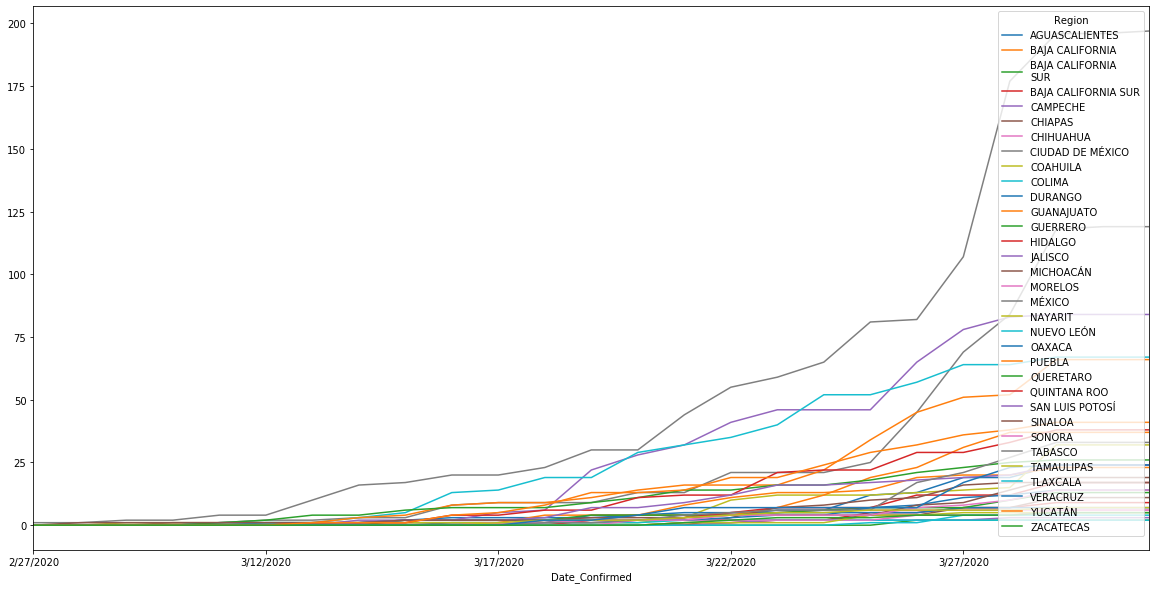

In [30]:
pivot_tbl_delta.fillna(0).cumsum().plot(figsize=(20,10))
#pivot_tbl_delta.fillna(0).cumsum()[['NUEVO LEÓN','CIUDAD DE MÉXICO','JALISCO']].plot(figsize=(20,10))

### Growth rate (linear)

Notice there are no dates - all we care is about the growth rate (so each region starts at day 0 from first case).

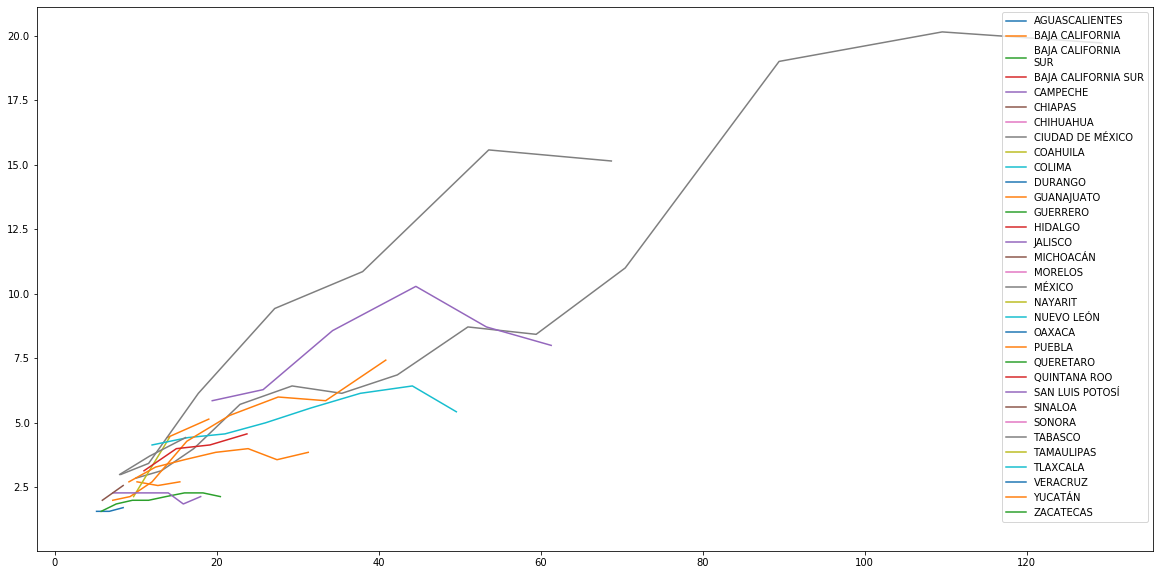

In [31]:
state_lane = {}

plt.figure(figsize=(20,10))

for state in ['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS']:
    plt.plot(list(pivot_tbl_cum[state].dropna().rolling(window=7).mean()), list(pivot_tbl_delta[state].dropna().rolling(window=7).mean()), label=state) # plotting t, c separately 
    pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('linear')
plt.xscale('linear')

plt.show()

### Growth rate (log scale)

Now let's take a look at log scale...

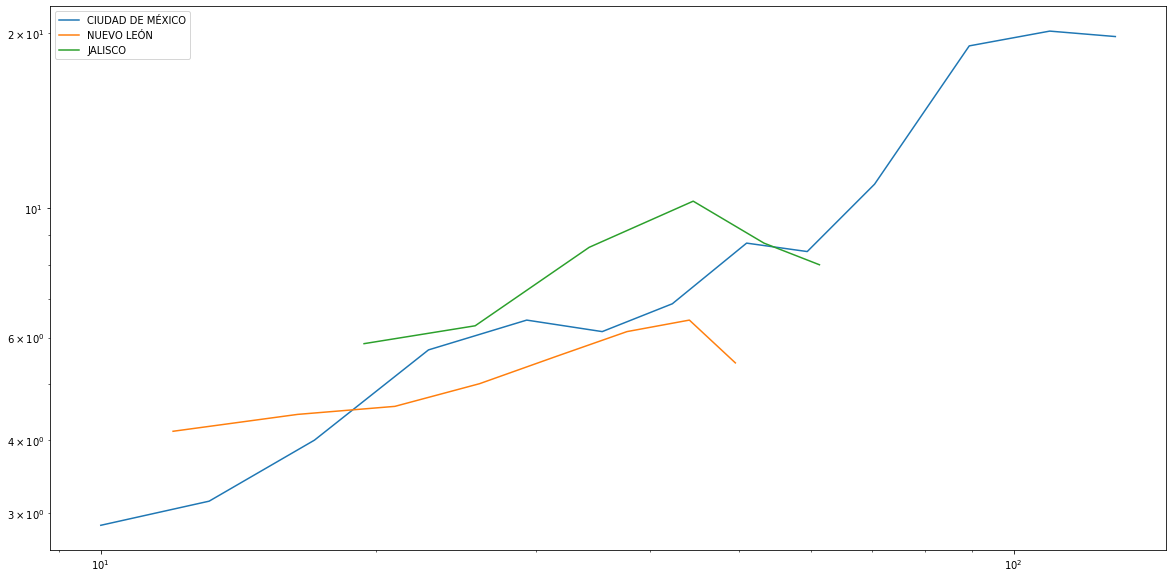

In [151]:
state_lane = {}

plt.figure(figsize=(20,10))

for state in ['CIUDAD DE MÉXICO', 'NUEVO LEÓN', 'JALISCO']:
    plt.plot(list(pivot_tbl_cum[state].dropna().rolling(window=7).mean()), list(pivot_tbl_delta[state].dropna().rolling(window=7).mean()), label = state) # plotting t, c separately 
    pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.show()